# 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'

# data

In [2]:
df_heart = pd.read_csv('../../data/heart_2020_cleaned.csv')
df_heart[:5]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## data info

In [3]:
print('data shape : ',df_heart.shape)
print('')
print(df_heart.info())

data shape :  (319795, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  objec

|항목|설명|Unique|분류|
|--|--|--|--|
|HeartDisease|관상동맥 심장 질환(CHD) 또는 심근경색(MI)을 앓은 적이 있다고 보고한 응답자|Yes,No|범주형 - 2분류|
|BMI|체질량 지수(BMI)||수치형|
|Smoking|평생 담배 100개비 이상을 피웠는지|Yes,No|범주형 - 2분류|
|AlcoholDrinking|성인 남성은 주 14잔 이상,여성은 주 7잔 이상 마시는 과음자|Yes,No|범주형 - 2분류|
|Stroke|뇌졸중을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|PhysicalHealth|신체적 질병과 부상을 포함한 신체 건강에 대해 지난 30일 중 며칠 동안 신체 건강이 좋지 않았던 일수|0~30|범주형 - 31분류|
|MentalHealth|정신 건강에 대해 지난 30일 중 며칠 동안 정신 건강이 좋지 않았던 일수|0~30|범주형 - 31분류|
|DiffWalking|걷거나 계단을 오르는 데 심각한 어려움이 있는지|Yes,No|범주형 - 2분류|
|Sex|성별|Male,Female|범주형 - 2분류|
|AgeCategory|연령대|5년 단위 18 ~ 80 연령대 분류|범주형 - 14분류|
|Race|인종,민족 추정값|white,black,asian,american indian/alaskan native,hispanic,other|범주형 - 6분류|
|Diabetic|당뇨병을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|PhysicalActivity|지난 30일 중 본업 외 신체 운동 여부|Yes,No|범주형 - 2분류|
|GenHealth|인지 건강상태|poor,fair,good,very good, excellent|범주형 - 5분류|
|SleepTime|평균 수면시간|1~24|범주형-24분류|
|Asthma|천식을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|KidneyDisease|결석, 방광염 또는 요실금을 제외한 신장 질환을 앓은 적이 있는지|Yes,No|범주형 - 2분류|
|SkinCancer|피부암을 앓은 적이 있는지|Yes,No|범주형 - 2분류|

## 분석 진행 방향

1. 각 columns별 카운팅 분석
2. 환자 세분화 후 세그먼트화 
3. 마켓 바구니 분석 기법 적용하여 발병 원인 분석


## 결측치 확인

In [4]:
df_heart.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## 이용자 세분화
- 심장병 유발자를 추출하여 세분화를 진행한다

In [96]:
df_imnotok = df_heart.query('HeartDisease == "Yes"')
df_imnotok = df_imnotok.reset_index()
df_imnotok = df_imnotok.drop(columns=['index','HeartDisease'])

In [97]:
df_imnotok

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
1,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
2,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
3,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
4,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27368,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6.0,Yes,No,No
27369,36.21,Yes,No,No,0.0,0.0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8.0,No,No,No
27370,37.12,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,7.0,No,No,No
27371,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No


### data 전처리
- 데이터 그루핑 작업 진행

In [98]:
df_imnotok.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,27373.000000,27373.000000,27373.000000,27373.000000
mean,29.401592,7.808242,4.641764,7.136156
std,6.577151,11.487819,9.171932,1.780863
min,12.210000,0.000000,0.000000,1.000000
25%,25.060000,0.000000,0.000000,6.000000
50%,28.340000,0.000000,0.000000,7.000000
75%,32.690000,15.000000,4.000000,8.000000
max,83.330000,30.000000,30.000000,24.000000


- BMI는 표준 분류법 (저체중 < 18.5, 정상체중 < 23, 과체중 < 25 , 경도비만 < 30, 중도비만 < 35>, 고도비만 > 35)
- SleepTime은 불면증, 과다수면의 경우가 다르므로 4가지로 분류 (중증 불면증 < 4 경도 불면증 < 7, 정상 < 9, 경도 과다수면 < 12 , 중증 과다수면 > 12)
- PhysicalHealth, MentalHealth는 평균값을 기준으로 좋음 / 나쁨 으로 분류

In [99]:
# BMI 그룹핑

def BMI_change(text):
    if text < 18.5:
        text = '저체중'
    elif text < 23:
        text = '정상체중'
    elif text < 25:
        text = '과체중'
    elif text < 30:
        text = '경도비만'
    elif text < 35:
        text = '중도비만'
    else:
        text = '고도비만'
    
    return text

df_imnotok['BMI'] = df_imnotok['BMI'].apply(BMI_change)

In [100]:
# SleepTime 그룹핑

def SleepTime_change(text):
    if text < 4:
        text = '중증 불면증'
    elif text < 7:
        text = '경도 불면증'
    elif text < 9:
        text = '정상'
    elif text < 12:
        text = '경도 과다수면'
    else:
        text = '중증 과다수면'
    
    return text

df_imnotok['SleepTime'] = df_imnotok['SleepTime'].apply(SleepTime_change)

In [101]:
# PhysicalHealth, MentalHealth 그룹핑

def mean_change(get_list):
    change_list = list()
    list_mean = np.mean(get_list)

    for i in get_list:
        if i >= list_mean:
            change_list.append('나쁨')
        else:
            change_list.append('좋음')

    return change_list

df_imnotok['PhysicalHealth'] = mean_change(df_imnotok['PhysicalHealth'])
df_imnotok['MentalHealth'] = mean_change(df_imnotok['MentalHealth'])

- 이 외 항목에서 Yes or No로 같은 내용을 가지고 있으므로 내용을 바꿔준다

In [102]:
# yes / no change to name

def change_yesno(dataframe):
    # column추출
    columns = dataframe.columns.to_list()

    for i in columns:
        # 시리즈 추출
        serise = dataframe[i]

        # 시리즈 이름 추출
        name = serise.name

        # 변환 리스트 초기화
        change_list = list()

        # 내용 변환
        for j in serise:
            if j[:3] == 'Yes':
                content = j.replace('Yes',name,1)
                change_list.append(content)
            elif j[:3] == 'No,':
                content = j.replace('No','No ' + name + ' ',1)
                change_list.append(content)
            elif j[:2] == 'No':
                content = j.replace('No','No ' + name,1)
                change_list.append(content)
            else:
                break
        
        # 리스트가 제작되었다면 변경
        if change_list:
            dataframe[i] = change_list

    return dataframe

In [103]:
df_imnotok = change_yesno(df_imnotok)

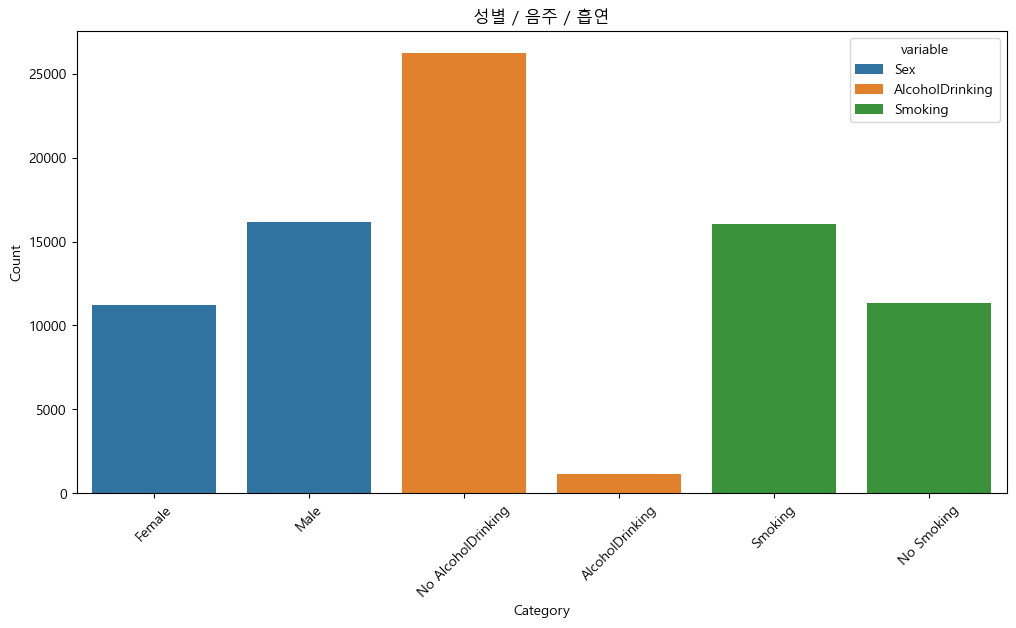

In [104]:
merged_data = pd.concat([df_imnotok['Sex'], df_imnotok['AlcoholDrinking'], df_imnotok['Smoking']], axis=1)

# 카테고리별 countplot을 그립니다.
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data.melt(), x='value', hue='variable')
plt.title('성별 / 음주 / 흡연')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

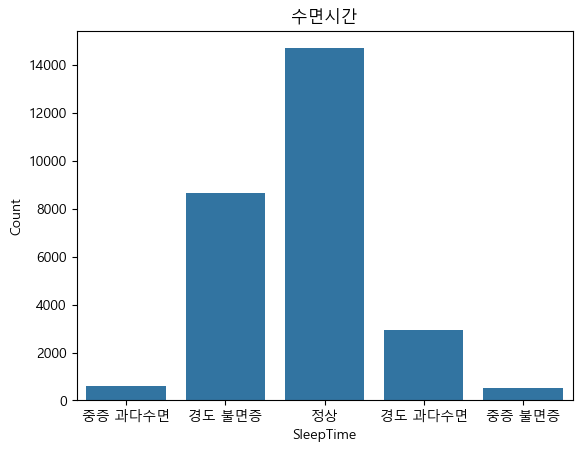

In [105]:
sns.countplot(data=df_imnotok, x='SleepTime')
plt.xlabel('SleepTime')
plt.ylabel('Count')
plt.title('수면시간')
plt.show()

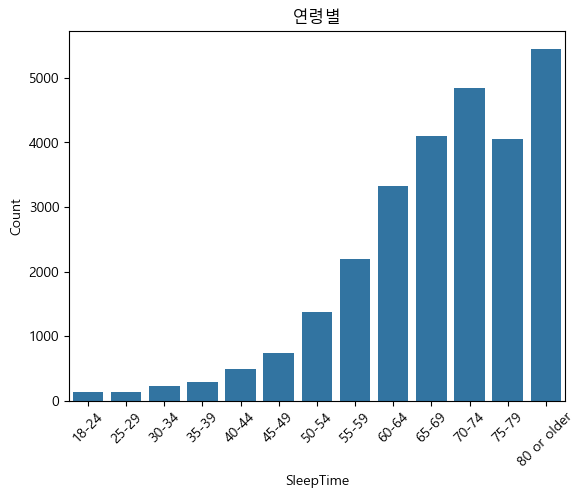

In [106]:
orders = sorted(df_imnotok['AgeCategory'].unique())

sns.countplot(data=df_imnotok, x='AgeCategory',order=orders)
plt.xlabel('SleepTime')
plt.ylabel('Count')
plt.title('연령별')
plt.xticks(rotation=45)
plt.show()

## 미발병 고객 적용